In [1]:
%matplotlib notebook  

In [2]:
#!nvidia-smi

In [3]:
import matplotlib.pyplot as plt
import h5py
import math

# Python 3 standard library
from pathlib import Path

##from torchsummary import summary
from model.plots import dual_train_plots_tracks_to_KDE

In [4]:
#ax, lax, lines = dual_train_plots_tracks_to_KDE()
#fig = ax.figure
#plt.tight_layout()

In [10]:
output_folder = 'ML_dir/Tracks_to_KDE_TestTrainedModel/'
output_path = Path(output_folder)

In [11]:
# -----------------------------------
# ADD THE STATS FROM MIKE's TRAINING 
# -----------------------------------
'''
mike_root_dir = "ML/"
mike_l_input_dirs = []

mike_l_input_dirs.append("16Jan2021_TracksToKDE_DDplusplus_loss_Ba_iter1_floatAll_300epochs_1em4_4xwill")
mike_l_input_dirs.append("18Jan_DDplus_loss_Ba_iter8_floatAll_100epochs_1em5_4xwill")
mike_l_input_dirs.append("19Jan_DDplus_loss_Ba_iter9_floatAll_75epochs_1em5_4xwill")
mike_l_input_dirs.append("20Jan_DDplus_loss_Ba_iter10_floatAll_75epochs_1em5_4xwill")
mike_l_input_dirs.append("20Jan_DDplus_loss_Ba_iter11_floatAll_100epochs_1em5_4xwill")
mike_l_input_dirs.append("21Jan_DDplus_loss_Ba_iter12_floatAll_10epochs_1em5_4xwill")
mike_l_input_dirs.append("21Jan_DDplus_loss_Ba_iter13_floatAll_60epochs_1p5em5_4xwill")
mike_l_input_dirs.append("22Jan_DDplus_loss_Ba_iter14_floatAll_60epochs_1p5em5_4xwill")
mike_l_input_dirs.append("22Jan_DDplus_loss_Ba_iter15_floatAll_100epochs_1p5em5_4xwill")
mike_l_input_dirs.append("23Jan_DDplus_loss_Ba_iter16_floatAll_150epochs_1p5em5_4xwill")
mike_l_input_dirs.append("24Jan_DDplus_loss_Ba_iter17_floatAll_150epochs_1p5em5_4xwill")
mike_l_input_dirs.append("25Jan_DDplus_loss_Ba_iter18_floatAll_60epochs_1p5em5_4xwill")

for input_dir in mike_l_input_dirs:
    stats = mike_root_dir + '/' + input_dir + '/' + input_dir + "_stats.hdf5"
    hf = h5py.File(stats, 'r')
    print(len(hf['results']['block0_values']))
    for i in range(len(hf['results']['block0_values'])):
        costs.append(hf['results']['block0_values'][i][1])
        vals.append(hf['results']['block0_values'][i][2])
        epochs.append(epoch)
        epoch+=1
'''
mike_root_dir = "ML_dir/"
mike_l_input_dirs = []

'''
20December_testing_DDplus_loss_Ba_iter0_floatAll_20epochs_1em3
20December_testing_DDplus_loss_Ba_iter1_floatAll_100epochs_1em3
20December_testing_DDplus_loss_Ba_iter2_floatAll_700epochs_2em4
20December_testing_DDplus_loss_Ba_iter2_floatAll_700epochs_5em5
21December_testing_DDplus_loss_Ba_iter4_floatAll_700epochs_5em6
18Jan_DDplus_loss_Ba_iter8_floatAll_100epochs_1em5_4xwill
19Jan_DDplus_loss_Ba_iter9_floatAll_75epochs_1em5_4xwill
20Jan_DDplus_loss_Ba_iter11_floatAll_100epochs_1em5_4xwill
21Jan_DDplus_loss_Ba_iter12_floatAll_10epochs_1em5_4xwill
21Jan_DDplus_loss_Ba_iter13_floatAll_60epochs_1p5em5_4xwill
22Jan_DDplus_loss_Ba_iter14_floatAll_60epochs_1p5em5_4xwill
22Jan_DDplus_loss_Ba_iter15_floatAll_100epochs_1p5em5_4xwill
23Jan_DDplus_loss_Ba_iter16_floatAll_150epochs_1p5em5_4xwill
25Jan_DDplus_loss_Ba_iter18_floatAll_60epochs_1p5em5_4xwill
'''
#mike_l_input_dirs.append("20December_testing_DDplus_loss_Ba_iter0_floatAll_20epochs_1em3")
#mike_l_input_dirs.append("20December_testing_DDplus_loss_Ba_iter1_floatAll_100epochs_1em3")
#mike_l_input_dirs.append("20December_testing_DDplus_loss_Ba_iter2_floatAll_700epochs_2em4")
#mike_l_input_dirs.append("20December_testing_DDplus_loss_Ba_iter2_floatAll_700epochs_5em5")
#mike_l_input_dirs.append("21December_testing_DDplus_loss_Ba_iter4_floatAll_700epochs_5em6")
mike_l_input_dirs.append("18Jan_DDplus_loss_Ba_iter8_floatAll_100epochs_1em5_4xwill")
mike_l_input_dirs.append("19Jan_DDplus_loss_Ba_iter9_floatAll_75epochs_1em5_4xwill")
#mike_l_input_dirs.append("20Jan_DDplus_loss_Ba_iter10_floatAll_75epochs_1em5_4xwill")
mike_l_input_dirs.append("20Jan_DDplus_loss_Ba_iter11_floatAll_100epochs_1em5_4xwill")
mike_l_input_dirs.append("21Jan_DDplus_loss_Ba_iter12_floatAll_10epochs_1em5_4xwill")
mike_l_input_dirs.append("21Jan_DDplus_loss_Ba_iter13_floatAll_60epochs_1p5em5_4xwill")
mike_l_input_dirs.append("22Jan_DDplus_loss_Ba_iter14_floatAll_60epochs_1p5em5_4xwill")
mike_l_input_dirs.append("22Jan_DDplus_loss_Ba_iter15_floatAll_100epochs_1p5em5_4xwill")
mike_l_input_dirs.append("23Jan_DDplus_loss_Ba_iter16_floatAll_150epochs_1p5em5_4xwill")
#mike_l_input_dirs.append("24Jan_DDplus_loss_Ba_iter17_floatAll_150epochs_1p5em5_4xwill")
mike_l_input_dirs.append("25Jan_DDplus_loss_Ba_iter18_floatAll_60epochs_1p5em5_4xwill")


In [12]:
# ----------------------------------------------------------------------------
# ADD THE STATS FROM SIMON's TRAINING (FOLLOWING MIKE's TRAINING)
# ----------------------------------------------------------------------------
simon_root_dir = "ML_dir/"
simon_l_input_dirs = []

simon_l_input_dirs.append("27Jan_DDplus_loss_Ba_iter19_floatAll_80epochs_1p5em5_4xwill")
simon_l_input_dirs.append("28Jan_DDplus_loss_Ba_iter20_floatAll_80epochs_1p5em5_4xwill")
# for iter21 there is a "gap" of 42 epochs. 
# Iter21 really started after 42 additional epochs not saved...
simon_l_input_dirs.append("30Jan_DDplus_loss_Ba_iter21_floatAll_150epochs_1p5em5_4xwill")  
simon_l_input_dirs.append("01Feb_DDplus_loss_Ba_iter22_floatAll_40epochs_1p5em5_4xwill")

simon_l_input_dirs.append("02Feb_DDplus_loss_Ba_iter23_floatAll_80epochs_1p5em5_4xwill")
simon_l_input_dirs.append("03Feb_DDplus_loss_Ba_iter25_floatAll_150epochs_1p5em5_4xwill")
simon_l_input_dirs.append("04Feb_DDplus_loss_Ba_iter26_floatAll_80epochs_1p5em5_4xwill")

simon_l_input_dirs.append("05Feb_DDplus_loss_Ba_iter27_floatAll_100epochs_1p5em5_4xwill")
simon_l_input_dirs.append("06Feb_DDplus_loss_Ba_iter28_floatAll_100epochs_1p5em5_4xwill")
simon_l_input_dirs.append("07Feb_DDplus_loss_Ba_iter29_floatAll_100epochs_1p5em5_4xwill")
#simon_l_input_dirs.append("17Feb_DDplus_loss_Ba_iter30_floatAll_50epochs_1p5em5_7xwill")


In [13]:
epoch = 1 
epochs = []
costs = []
vals = []
time = []
cum_time = []


for input_dir in mike_l_input_dirs:
    stats = mike_root_dir + '/temp_Mike_statsfiles/' + input_dir + "_stats.hdf5"
    hf = h5py.File(stats, 'r')
    print(len(hf['results']['block0_values']))
    for i in range(len(hf['results']['block0_values'])):
        costs.append(hf['results']['block0_values'][i][1])
        vals.append(hf['results']['block0_values'][i][2])
        time.append(hf['results']['block0_values'][i][3])
        cum_time.append(sum(time))
        epochs.append(epoch)
        epoch+=1


for input_dir in simon_l_input_dirs:
    stats = simon_root_dir + '/' + input_dir + '/' + input_dir + "_stats.hdf5"
    hf = h5py.File(stats, 'r')
    print(len(hf['results']['block0_values']))
    for i in range(len(hf['results']['block0_values'])):
        costs.append(hf['results']['block0_values'][i][1])
        vals.append(hf['results']['block0_values'][i][2])
        time.append(hf['results']['block0_values'][i][3])
        cum_time.append(sum(time))
        epochs.append(epoch)
        epoch+=1
        

100
75
100
10
60
60
100
150
60
80
80
150
40
80
122
80
100
100
100


<IPython.core.display.Javascript object>


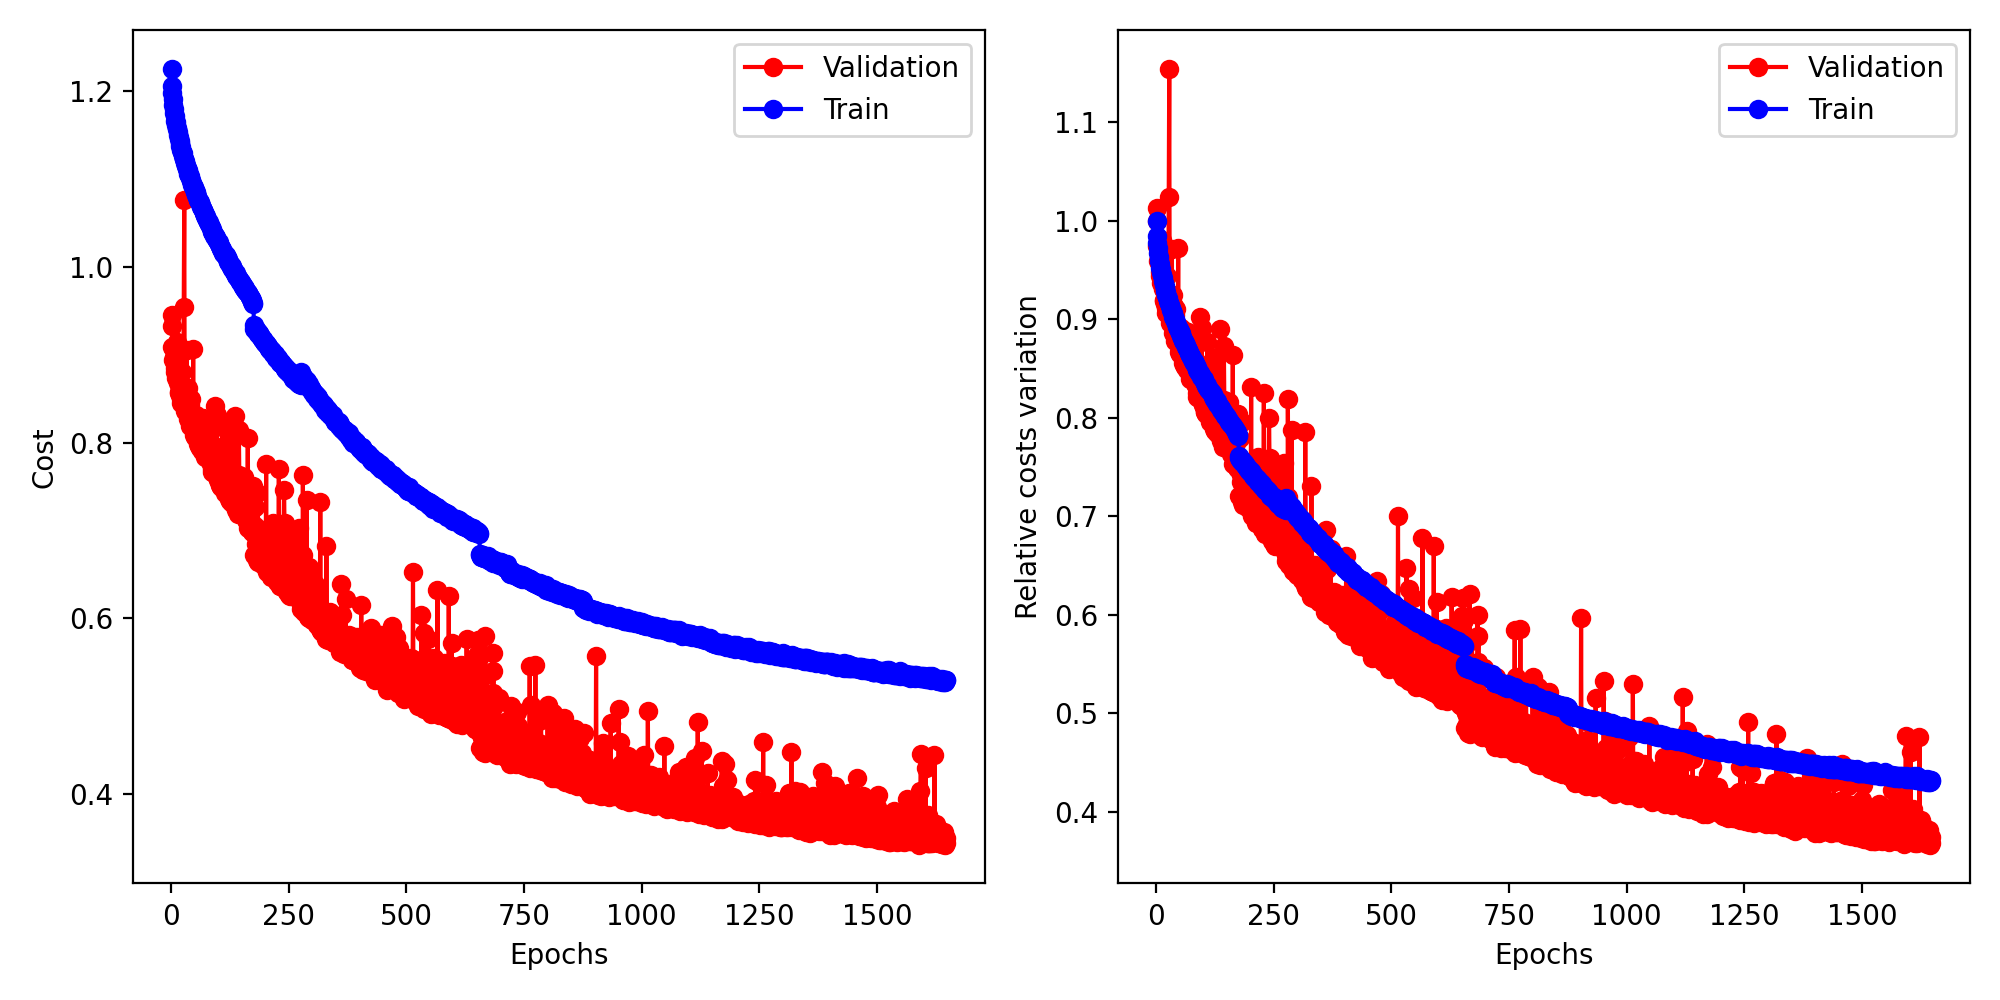

In [14]:
dual_train_plots_tracks_to_KDE(epochs,
                               costs, vals,
                               costs/costs[0], vals/vals[0])
plt.tight_layout()
fname = 'tracks_to_KDE_DDplus_loss_Ba_iters_1_to_29'
plt.savefig(str(output_path / f'{fname}.png'))
plt.savefig(str(output_path / f'{fname}.pdf'))

In [15]:
valsperbin = 10
nbins = math.floor(len(costs)/valsperbin)+1
epochs_av = []
costs_av  = []
vals_av   = []
for i in range(nbins):
    bin_lo = i*valsperbin
    bin_hi = (i+1)*valsperbin
    
    epochs_av.append(sum(epochs[bin_lo:bin_hi])/len(epochs[bin_lo:bin_hi]))
    costs_av.append(sum(costs[bin_lo:bin_hi])/len(costs[bin_lo:bin_hi]))
    vals_av.append(sum(vals[bin_lo:bin_hi])/len(vals[bin_lo:bin_hi]))
    #print(epochs_av)
    #print(costs_av)
    #print(vals_av)    

<IPython.core.display.Javascript object>


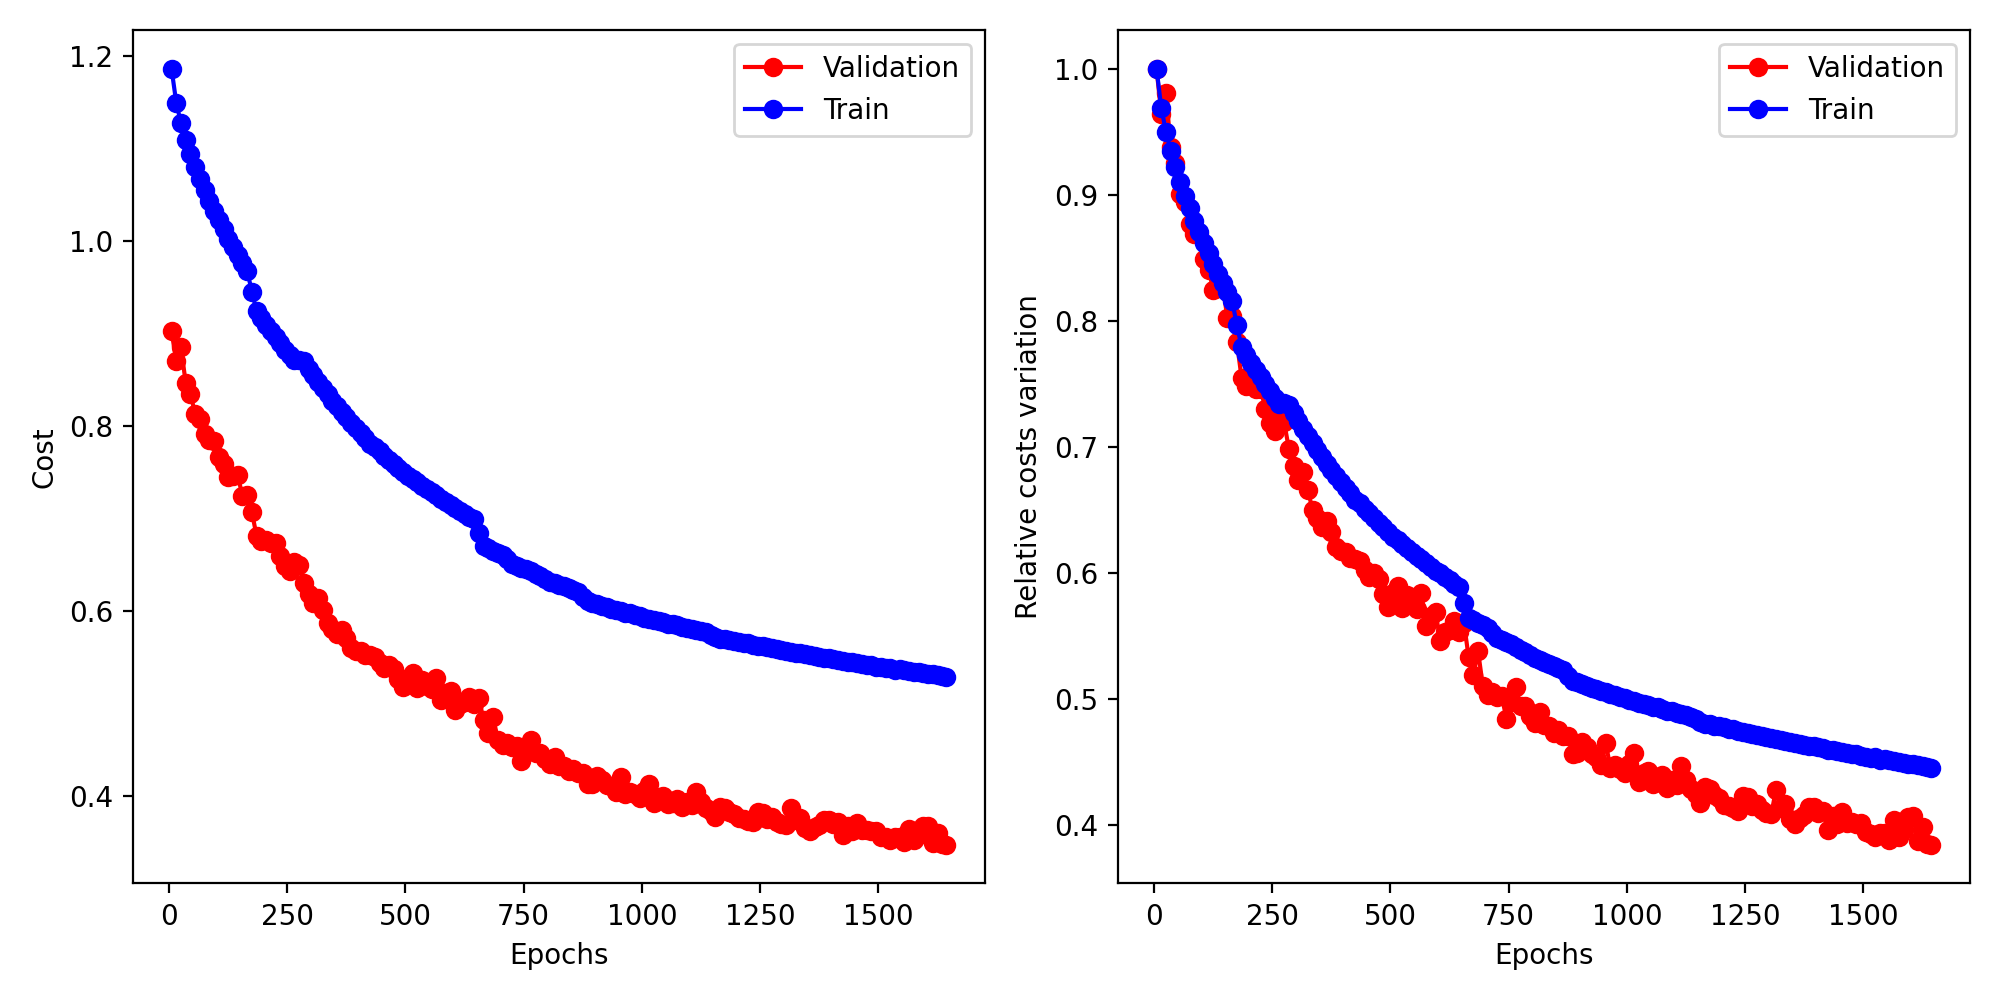

In [16]:
dual_train_plots_tracks_to_KDE(epochs_av,
                               costs_av, vals_av,
                               costs_av/costs_av[0], vals_av/vals_av[0])
plt.tight_layout()
fname = 'tracks_to_KDE_DDplus_loss_Ba_iters_1_to_29_averaged'
plt.savefig(str(output_path / f'{fname}.png'))
plt.savefig(str(output_path / f'{fname}.pdf'))

In [ ]:
len(cum_time)

In [ ]:
cum_time[len(cum_time)-1]

In [ ]:
cum_time[len(cum_time)-1]/3600